To run a cell, type `Shift` + `Return`. Run the cell below to get started

In [1]:
from workshop_utils import * 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# All Edits Example



The following query gets all of the edits (ever), joined to changesets for all objects in Haiti... it should take some time to download.

```sql
SELECT
  central_america.id, 
  geom,
  central_america.tags, changeset, updated, valid_until, version, minor_version,
  changesets.id AS c_id, 
  changesets.tags as c_tags,
  changesets.uid,
  changesets.user
  
FROM central_america

JOIN changesets on central_america.changeset = changesets.id

WHERE ST_WITHIN(
  geom , 
  ST_POLYGON('POLYGON((-72.7306 18.817, -72.0793 18.817, -72.0793 18.327, -72.7306 18.327, -72.7306 18.817))')
)```

In [3]:
edits = load_dataframe_from_s3('6f306d4f-5156-4d19-b641-b37d37efbbeb')


/www/6f306d4f-5156-4d19-b641-b37d37efbbeb.csv
Creating dataframe... done.  Found 1,107,721 rows

In [4]:
edits.head(2)

,id,geom,tags,changeset,updated,valid_until,version,minor_version,c_id,c_tags,uid,user
0,446526344,"POLYGON ((-72.6547439 18.4742102, -72.6546686 ...",{building=yes},42735229,2016-10-08 14:39:02.000,NaN,1,0,42735229,{comment=#hotosm-project-2211 #hurricaneMatthe...,1815735,Giblet
1,808366795,POINT (-72.4214256 18.5414186),"{operational_status_quality=confirmed, operati...",6347888,2010-11-12 01:03:43.000,2010-11-13 17:16:44.000,5,0,6347888,"{comment=key misspellings, created_by=JOSM/1.5...",98876,rsoden


In [5]:
#Cast the date as date
edits['updated'] = edits.updated.apply(pd.Timestamp)

In [6]:
edits['date'] = edits.updated.apply(pd.Timestamp.date)

In [7]:
gb_date = edits.groupby('date').aggregate({
    'c_id':'count',
    'id':'nunique',
    'uid':'nunique'
});
gb_date.head(2)

,c_id,id,uid
date,,,
2007-03-18,1,1,1
2008-01-26,1,1,1


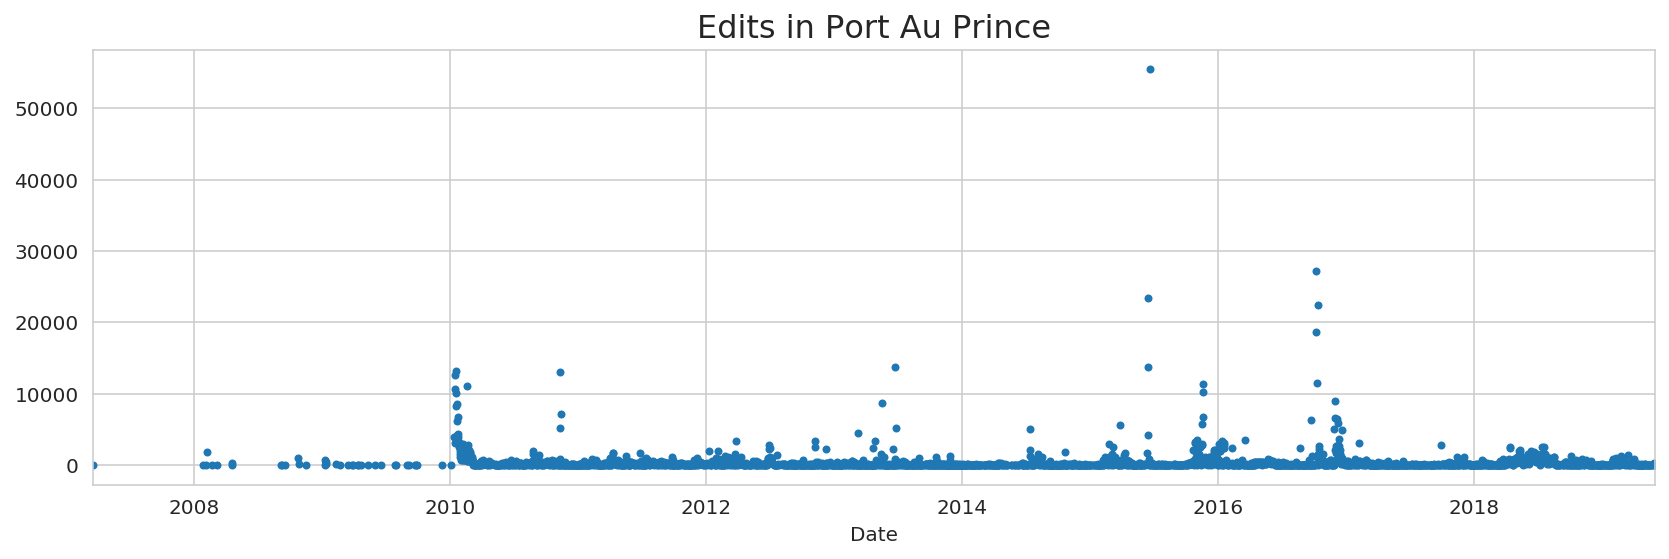

In [8]:
sns.set_style('whitegrid')
ax = gb_date['c_id'].plot(style='.', figsize=(14,4))
ax.set_xlabel("Date"); ax.set_ylabel("");
ax.set_title("Edits in Port Au Prince",fontsize=16);

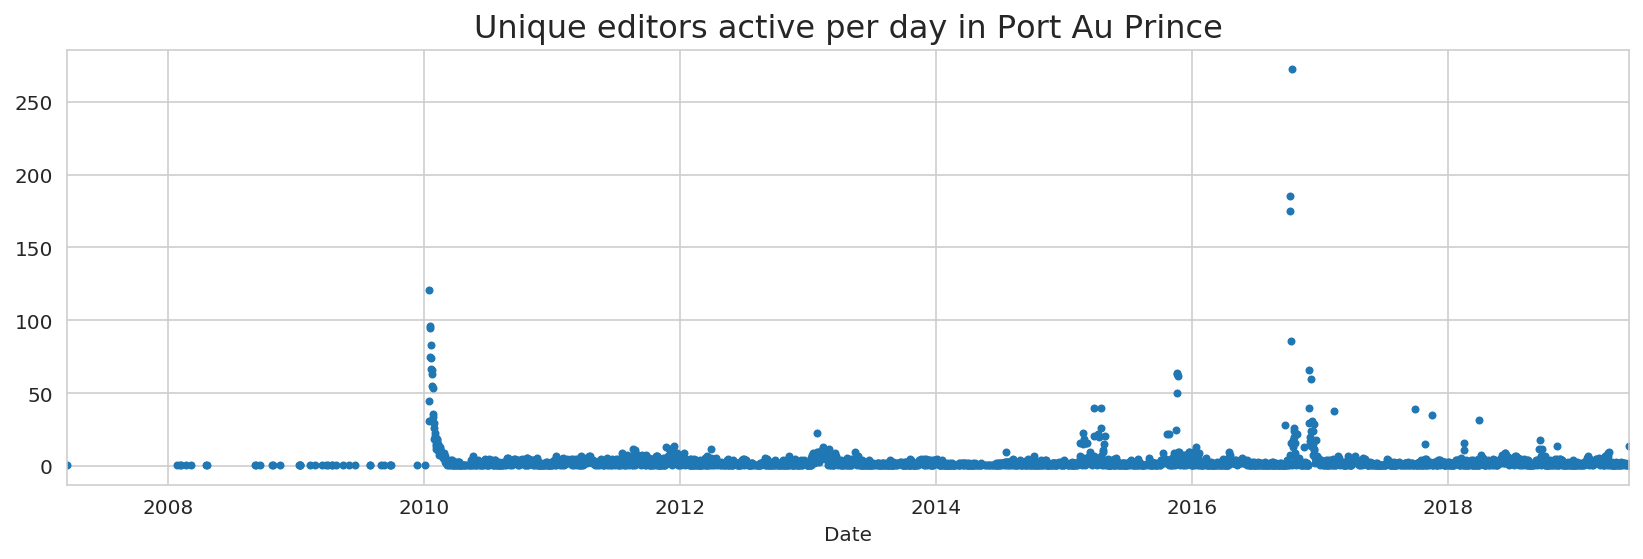

In [9]:
sns.set_style('whitegrid')
ax = gb_date['uid'].plot(style='.', figsize=(14,4))
ax.set_xlabel("Date"); ax.set_ylabel("");
ax.set_title("Unique editors active per day in Port Au Prince",fontsize=16);